# Task b

Frederik Rogge, Mouhammad Abu Rasheed and Homa Priya Tarigopula

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
import matplotlib.pyplot as plt
from sklearn.utils import resample
import os
%matplotlib inline
from models import *

from copy import deepcopy
np.random.seed(0)


In [2]:
# Create data
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x, y)

def FrankeFunction(x, y):
    """
    Returns value of Franke function at (x, y).
    """    
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


# Compute z
z = FrankeFunction(x, y)

# Create features as pairs of (x, y)
features = np.stack([x.ravel(), y.ravel()], axis=1)


# Get labels
labels = z.ravel()
labels = labels.reshape((-1,1))


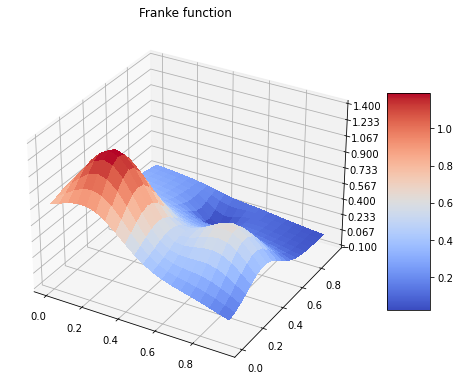

In [3]:
def plot_function(x, y, z, title=None):
    # Plot function
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface.
    surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    if title is not None:
        plt.title(title)
    
    plt.show()
    
plot_function(x, y, z, 'Franke function')

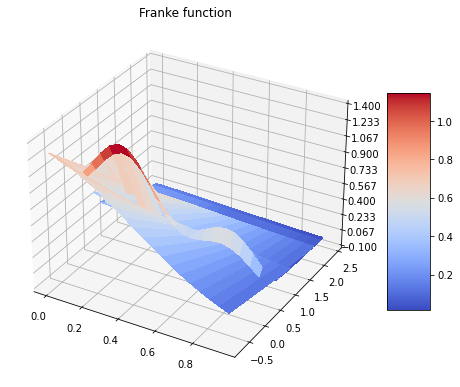

In [4]:

    

x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
y= y+np.random.normal(0 , 1.0 , y.shape )
x, y = np.meshgrid(x, y)

def FrankeFunction(x, y):
    """
    Returns value of Franke function at (x, y).
    """    
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


# Compute z
z = FrankeFunction(x, y)



plot_function(x, y, z, 'Franke function')

### Part b) : Bias Variance trade-off on Franke function

#### Refer task 1 for MSE as a function of complexity 

### Part b) : Bootstrap Resampling technique

In [5]:
def bias_variance_error(y_test, y_pred):
    error = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    return error, bias, variance

def bootstrap(X_train, y_train, x_test, y_test,
              percentage_of_train_data=1.0, degree_of_polynomial=14,
              scaling=False, add_noise=False, mean=0.0, std=0.1,
              number_of_bootstraps=100,solver=LinearRegression, **solver_args):
    e_ = np.zeros(degree_of_polynomial-1)
    b_ = np.zeros(degree_of_polynomial-1)
    v_ = np.zeros(degree_of_polynomial-1)
    X_train_actual= deepcopy(X_train)
    y_train_actual= deepcopy(y_train)
    
    indices = np.random.choice(len(y_train), int(percentage_of_train_data*len(y_train)), replace=False)
    X_train, y_train = X_train_actual[indices], y_train_actual[indices]
    # iterate over the polyniomial degree
    for d in range(1,degree_of_polynomial):
        #scale data if necessary
        if scaling == True:
            model = make_pipeline(PolynomialFeatures(degree=d ),StandardScaler(with_std= True), solver(**solver_args))
        else:
            model = make_pipeline(PolynomialFeatures(degree=d), solver(**solver_args))
        #resample and estimate the bias, varaince  and error on the test data
        y_pred = np.zeros((y_test.shape[0], number_of_bootstraps))
        for b in range(number_of_bootstraps):
            x_, y_ = resample(X_train,y_train, random_state=b)

            model_output = model.fit(x_, y_).predict(x_test).ravel()
            #print('here ', x_.shape, y_.shape, x_test.shape, model_output.shape)
            y_pred[:,b]=model_output
        error, bias, var= bias_variance_error(y_test, y_pred)

        e_[d-1]= error
        b_[d-1]= bias
        v_[d-1]= var
    return e_, b_, v_

#### Bootstrap bias variance tradeoff -1

Here we examine ths bias-variance tradeoff on the test set without noise and without scaling

(320, 1) (80, 1)


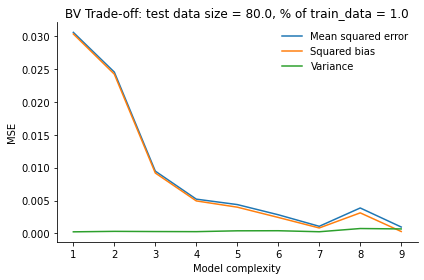

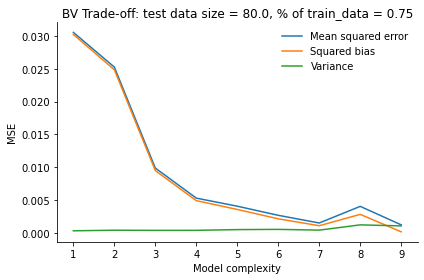

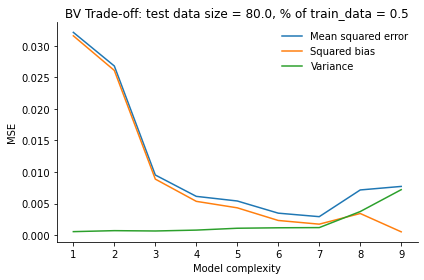

In [6]:
degree_of_polynomial=1
add_noise= False

if add_noise :
    np.random.seed(1)
    labels_n = labels +  np.random.normal(0 , 1, labels.shape )
else :
    labels_n = labels
    
#define the input argumets for the solver 
solver_args ={ 'fit_intercept': True }

# Hold out some test data that is never used in training.
X_train, x_test, y_train, y_test = train_test_split(features, labels_n, 
                                                    test_size=0.2, random_state = 2021)


print(y_train.shape, y_test.shape)
for dat in [1.0, 0.75, 0.5]:
    e,b,v = bootstrap(X_train=X_train, y_train=y_train, x_test=x_test, y_test=y_test,
                  percentage_of_train_data= dat, degree_of_polynomial=degree_of_polynomial,
                  scaling=False,
                  number_of_bootstraps=5000,solver=LinearRegression, **solver_args)

    polynomial = np.arange(1, degree_of_polynomial)
    title = 'BV Trade-off: test data size = '+str(np.round(0.2*len(labels), 2))+', % of train_data = '+ str(dat)
    plot_metric(y=[e,b,v], x= polynomial, show= True, title=title , name='b_without_noise_without_scaling_'+ str(dat)+'.png', x_label='Model complexity', y_label='MSE',  save=True, legend = ['Mean squared error','Squared bias','Variance'])

#### Bootstrap bias variance tradeoff - 2

Here we examine ths bias-variance tradeoff on the test set without noise and with scaling

(320, 1) (80, 1)


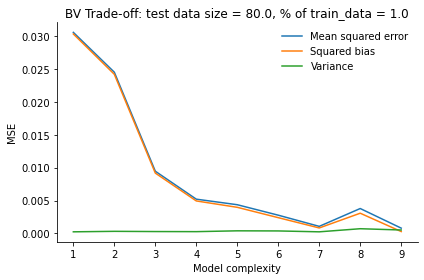

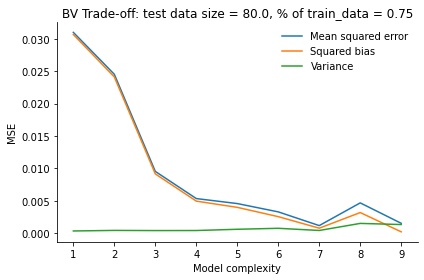

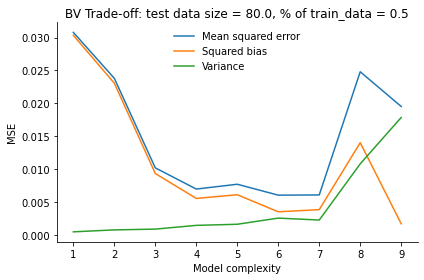

In [7]:
add_noise= False
degree_of_polynomial=10
if add_noise :
    np.random.seed(1)
    labels_n = labels +  np.random.normal(0 , 1, labels.shape )
else :
    labels_n = labels
    
#define the input argumets for the solver 
solver_args ={ 'fit_intercept': True }

# Hold out some test data that is never used in training.
X_train, x_test, y_train, y_test = train_test_split(features, labels_n, 
                                                    test_size=0.2, random_state = 2021)


print(y_train.shape, y_test.shape)
for dat in [1.0, 0.75, 0.5]:
    e,b,v = bootstrap(X_train=X_train, y_train=y_train, x_test=x_test, y_test=y_test,
                  percentage_of_train_data= dat, degree_of_polynomial=degree_of_polynomial,
                  scaling=True,
                  number_of_bootstraps=5000,solver=LinearRegression, **solver_args)

    polynomial = np.arange(1, degree_of_polynomial)
    title = 'BV Trade-off: test data size = '+str(np.round(0.2*len(labels), 2))+', % of train_data = '+ str(dat)
    plot_metric(y=[e,b,v], x= polynomial, show= True, title=title , name='b_without_noise_with_scaling_'+ str(dat)+'.png', x_label='Model complexity', y_label='MSE',  save=True, legend = ['Mean squared error','Squared bias','Variance'])

   

#### Bootstrap bias variance tradeoff - 3

Here we examine ths bias-variance tradeoff on the test set with noise and with scaling

(320, 1) (80, 1)


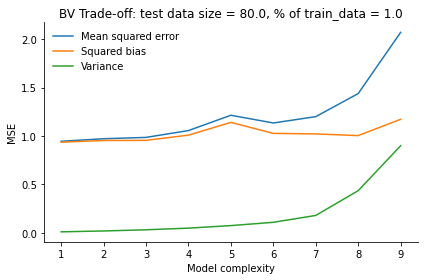

[0.94491837 0.97120072 0.98492546 1.05562737 1.21381056 1.13399243
 1.19941761 1.43792164 2.07021966] [0.93567948 0.95304271 0.95450242 1.00829515 1.14017957 1.02644695
 1.0207414  1.00360819 1.17181512] [0.00923889 0.018158   0.03042304 0.04733221 0.07363099 0.10754548
 0.17867621 0.43431345 0.89840455]


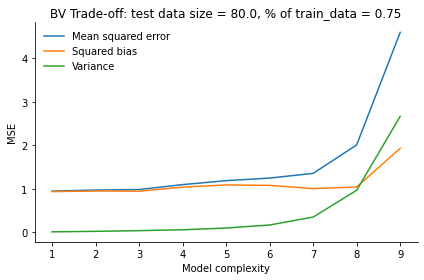

[0.94688025 0.97174082 0.98351247 1.09594591 1.18746242 1.24658969
 1.35511526 2.00890212 4.59676256] [0.93587794 0.94950016 0.94525163 1.03767757 1.08914821 1.07851601
 1.00495101 1.04213885 1.93069393] [0.01100231 0.02224066 0.03826084 0.05826834 0.09831421 0.16807368
 0.35016425 0.96676328 2.66606863]


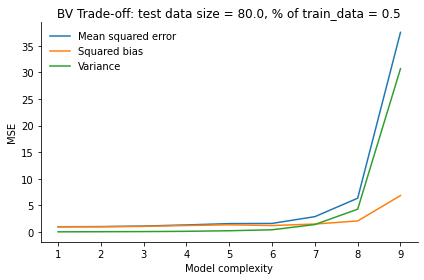

[ 0.97653911  1.00230711  1.10156139  1.31493273  1.56068846  1.59722154
  2.86973157  6.33742321 37.52332572] [0.95941815 0.96643815 1.03817415 1.20221697 1.3388195  1.19815903
 1.47996423 2.06330209 6.83569152] [1.71209646e-02 3.58689606e-02 6.33872340e-02 1.12715761e-01
 2.21868959e-01 3.99062512e-01 1.38976734e+00 4.27412112e+00
 3.06876342e+01]


In [8]:
add_noise= True
degree_of_polynomial=10
if add_noise :
    np.random.seed(1)
    labels_n = labels +  np.random.normal(0 , 1, labels.shape )
else :
    labels_n = labels
    
#define the input argumets for the solver 
solver_args ={ 'fit_intercept': True }

# Hold out some test data that is never used in training.
X_train, x_test, y_train, y_test = train_test_split(features, labels_n, 
                                                    test_size=0.2, random_state = 2021)


print(y_train.shape, y_test.shape)
for dat in [1.0, 0.75, 0.5]:
    e,b,v = bootstrap(X_train=X_train, y_train=y_train, x_test=x_test, y_test=y_test,
                  percentage_of_train_data= dat, degree_of_polynomial=degree_of_polynomial,
                  scaling=True,
                  number_of_bootstraps=5000,solver=LinearRegression, **solver_args)

    polynomial = np.arange(1, degree_of_polynomial)
    title = 'BV Trade-off: test data size = '+str(np.round(0.2*len(labels), 2))+', % of train_data = '+ str(dat)
    plot_metric(y=[e,b,v], x= polynomial, show= True, title=title , name='b_with_noise_with_scaling_'+ str(dat)+'.png', x_label='Model complexity', y_label='MSE',  save=True, legend = ['Mean squared error','Squared bias','Variance'])
    
    print(e,b,v)
